In [23]:
import matplotlib.pyplot as plt
import numpy as np
import math

lin_dataset = [i.strip().split() for i in open("D:\\David\\Tasks\\Deep Learning\\Homework\\HW2\\No 8\\manuf_learn.dat").readlines()]

Y = [i[5] for i in lin_dataset]
Y = np.array(Y, dtype=np.float64)
print('Y : ')
print(Y)

X = lin_dataset
for i in range(6):
    X = np.delete(X, 0, 1)
X = np.array(X, dtype=np.float64)
print('\n')
print('X\'s : ')
print(X)

Y : 
[4.78749 4.94164 4.55388 4.82831 4.38203 4.31749 4.17439 3.91202 4.00733
 3.68888 3.68888 3.63759 3.46574 3.58352 3.21888 3.21888 2.99573 3.17805
 2.94444 3.21888]


X's : 
[[2.30259 2.3979 ]
 [2.30259 2.07944]
 [2.99573 3.98898]
 [2.99573 3.21888]
 [3.68888 4.60517]
 [3.68888 4.38203]
 [4.38203 5.39363]
 [4.38203 5.01064]
 [5.07517 6.01616]
 [5.07517 6.21461]
 [5.76832 6.49224]
 [5.76832 6.39693]
 [6.46147 6.69703]
 [6.46147 6.62007]
 [7.15462 6.79122]
 [7.15462 6.68461]
 [7.84776 6.8977 ]
 [7.84776 6.80239]
 [8.54091 7.05186]
 [8.54091 6.90776]]


In [24]:
X_norm = X / np.linalg.norm(X)
X_n1 = np.insert(X_norm, 0, 1, 1)

print('Final X\'s : ')
print(X_n1)

Final X's : 
[[1.         0.06321412 0.06583071]
 [1.         0.06321412 0.05708787]
 [1.         0.08224323 0.1095114 ]
 [1.         0.08224323 0.08836947]
 [1.         0.10127261 0.12642796]
 [1.         0.10127261 0.12030199]
 [1.         0.12030199 0.14807394]
 [1.         0.12030199 0.13755953]
 [1.         0.1393311  0.16516456]
 [1.         0.1393311  0.1706127 ]
 [1.         0.15836048 0.17823461]
 [1.         0.15836048 0.17561802]
 [1.         0.17738987 0.18385681]
 [1.         0.17738987 0.18174399]
 [1.         0.19641925 0.18644265]
 [1.         0.19641925 0.18351584]
 [1.         0.21544836 0.1893659 ]
 [1.         0.21544836 0.18674931]
 [1.         0.23447774 0.19359813]
 [1.         0.23447774 0.18964208]]


In [25]:
w = np.random.rand(1,len(X_n1[0]))

alpha = 0.09
alpha_decay = alpha
n=0
max_iter = 10000
error = 10000000

alpha_hist = []
error_hist = []

while (n < max_iter) and error > 0.254 : 
    ex_sum = np.zeros(len(X_n1[0]))
    error = 0
    for i in range(len(X_n1)) :
        h = np.dot(X_n1[i], w.transpose())
        e = Y[i] - h
        ex = np.multiply(e, X_n1[i])
        ex_sum = ex_sum + ex
        error = error + np.power((h - Y[i]), 2)
    u = np.multiply(alpha_decay, ex_sum)
    w = w + u
    
    if error[0] < 0.3 :
        alpha_decay = alpha / math.log(n,200)
    
    alpha_hist.append(alpha_decay)
    error_hist.append(error[0])
    n=n+1

In [26]:
print('Tetha = ' + str(w[0]))

print('\nIntercept : ', w[0][0])
print('Slope : ', w[0][1], '   ', w[0][2])

w = np.round(w,4)
print('\nEquation = ', w[0][0], ' + ', w[0][1], ' X1 + ', w[0][2], ' X2')

Tetha = [ 5.70934099 -7.3510644  -5.12219594]

Intercept :  5.7093409862511715
Slope :  -7.351064395152451     -5.122195939829069

Equation =  5.7093  +  -7.3511  X1 +  -5.1222  X2


In [27]:
predict = np.zeros(len(X_n1))

for i in range(len(X_n1)):
    predict[i] = w[0][0]+w[0][1]*X_n1[i][1]+w[0][2]*X_n1[i][2]

predict = np.round(predict,5)
   
print(' Target      Prediction')
for i in range(len(predict)):
    print(Y[i], '     ', predict[i])

 Target      Prediction
4.78749       4.90741
4.94164       4.95219
4.55388       4.54378
4.82831       4.65208
4.38203       4.31725
4.31749       4.34862
4.17439       4.06648
3.91202       4.12034
4.00733       3.83906
3.68888       3.81115
3.68888       3.63222
3.63759       3.64563
3.46574       3.46354
3.58352       3.47436
3.21888       3.31041
3.21888       3.3254
2.99573       3.15555
3.17805       3.16895
2.94444       2.99398
3.21888       3.01425


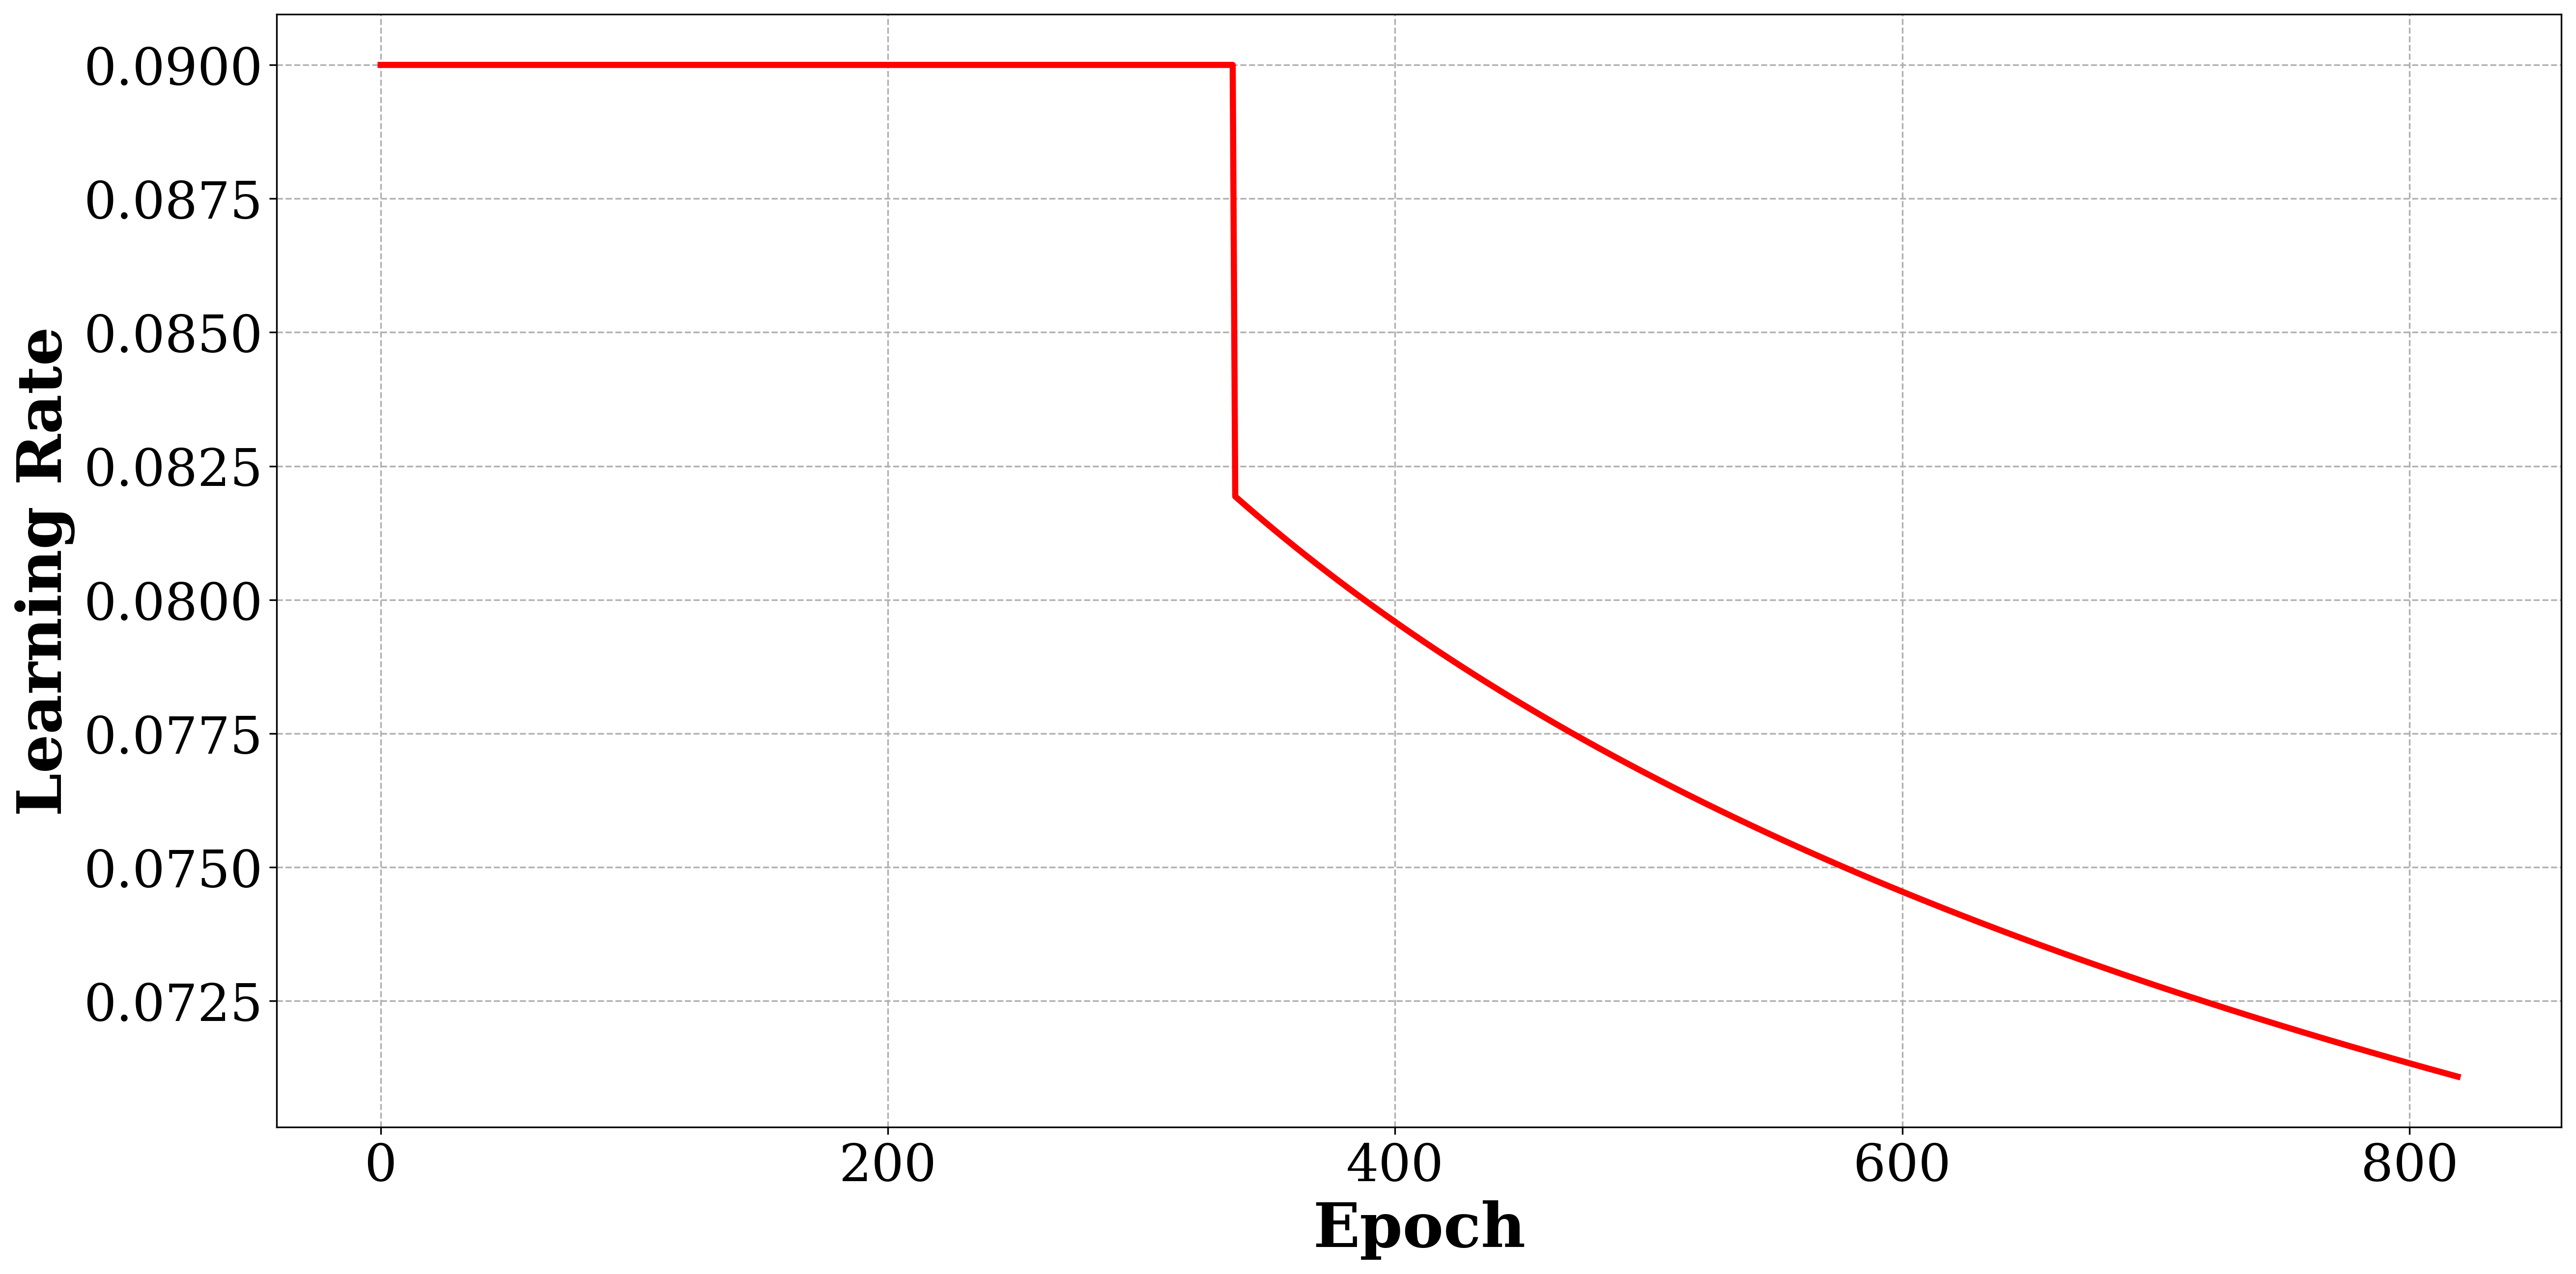

In [28]:
x_plot = np.arange(0, len(alpha_hist), 1);

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

plt.figure(figsize=(20, 10), dpi=300)

plt.plot(x_plot, alpha_hist, color='red', linewidth=3)

plt.xlabel('Epoch', fontsize=30, fontweight='bold');
plt.ylabel('Learning Rate', fontsize=30, fontweight='bold');

plt.grid(linestyle='--')

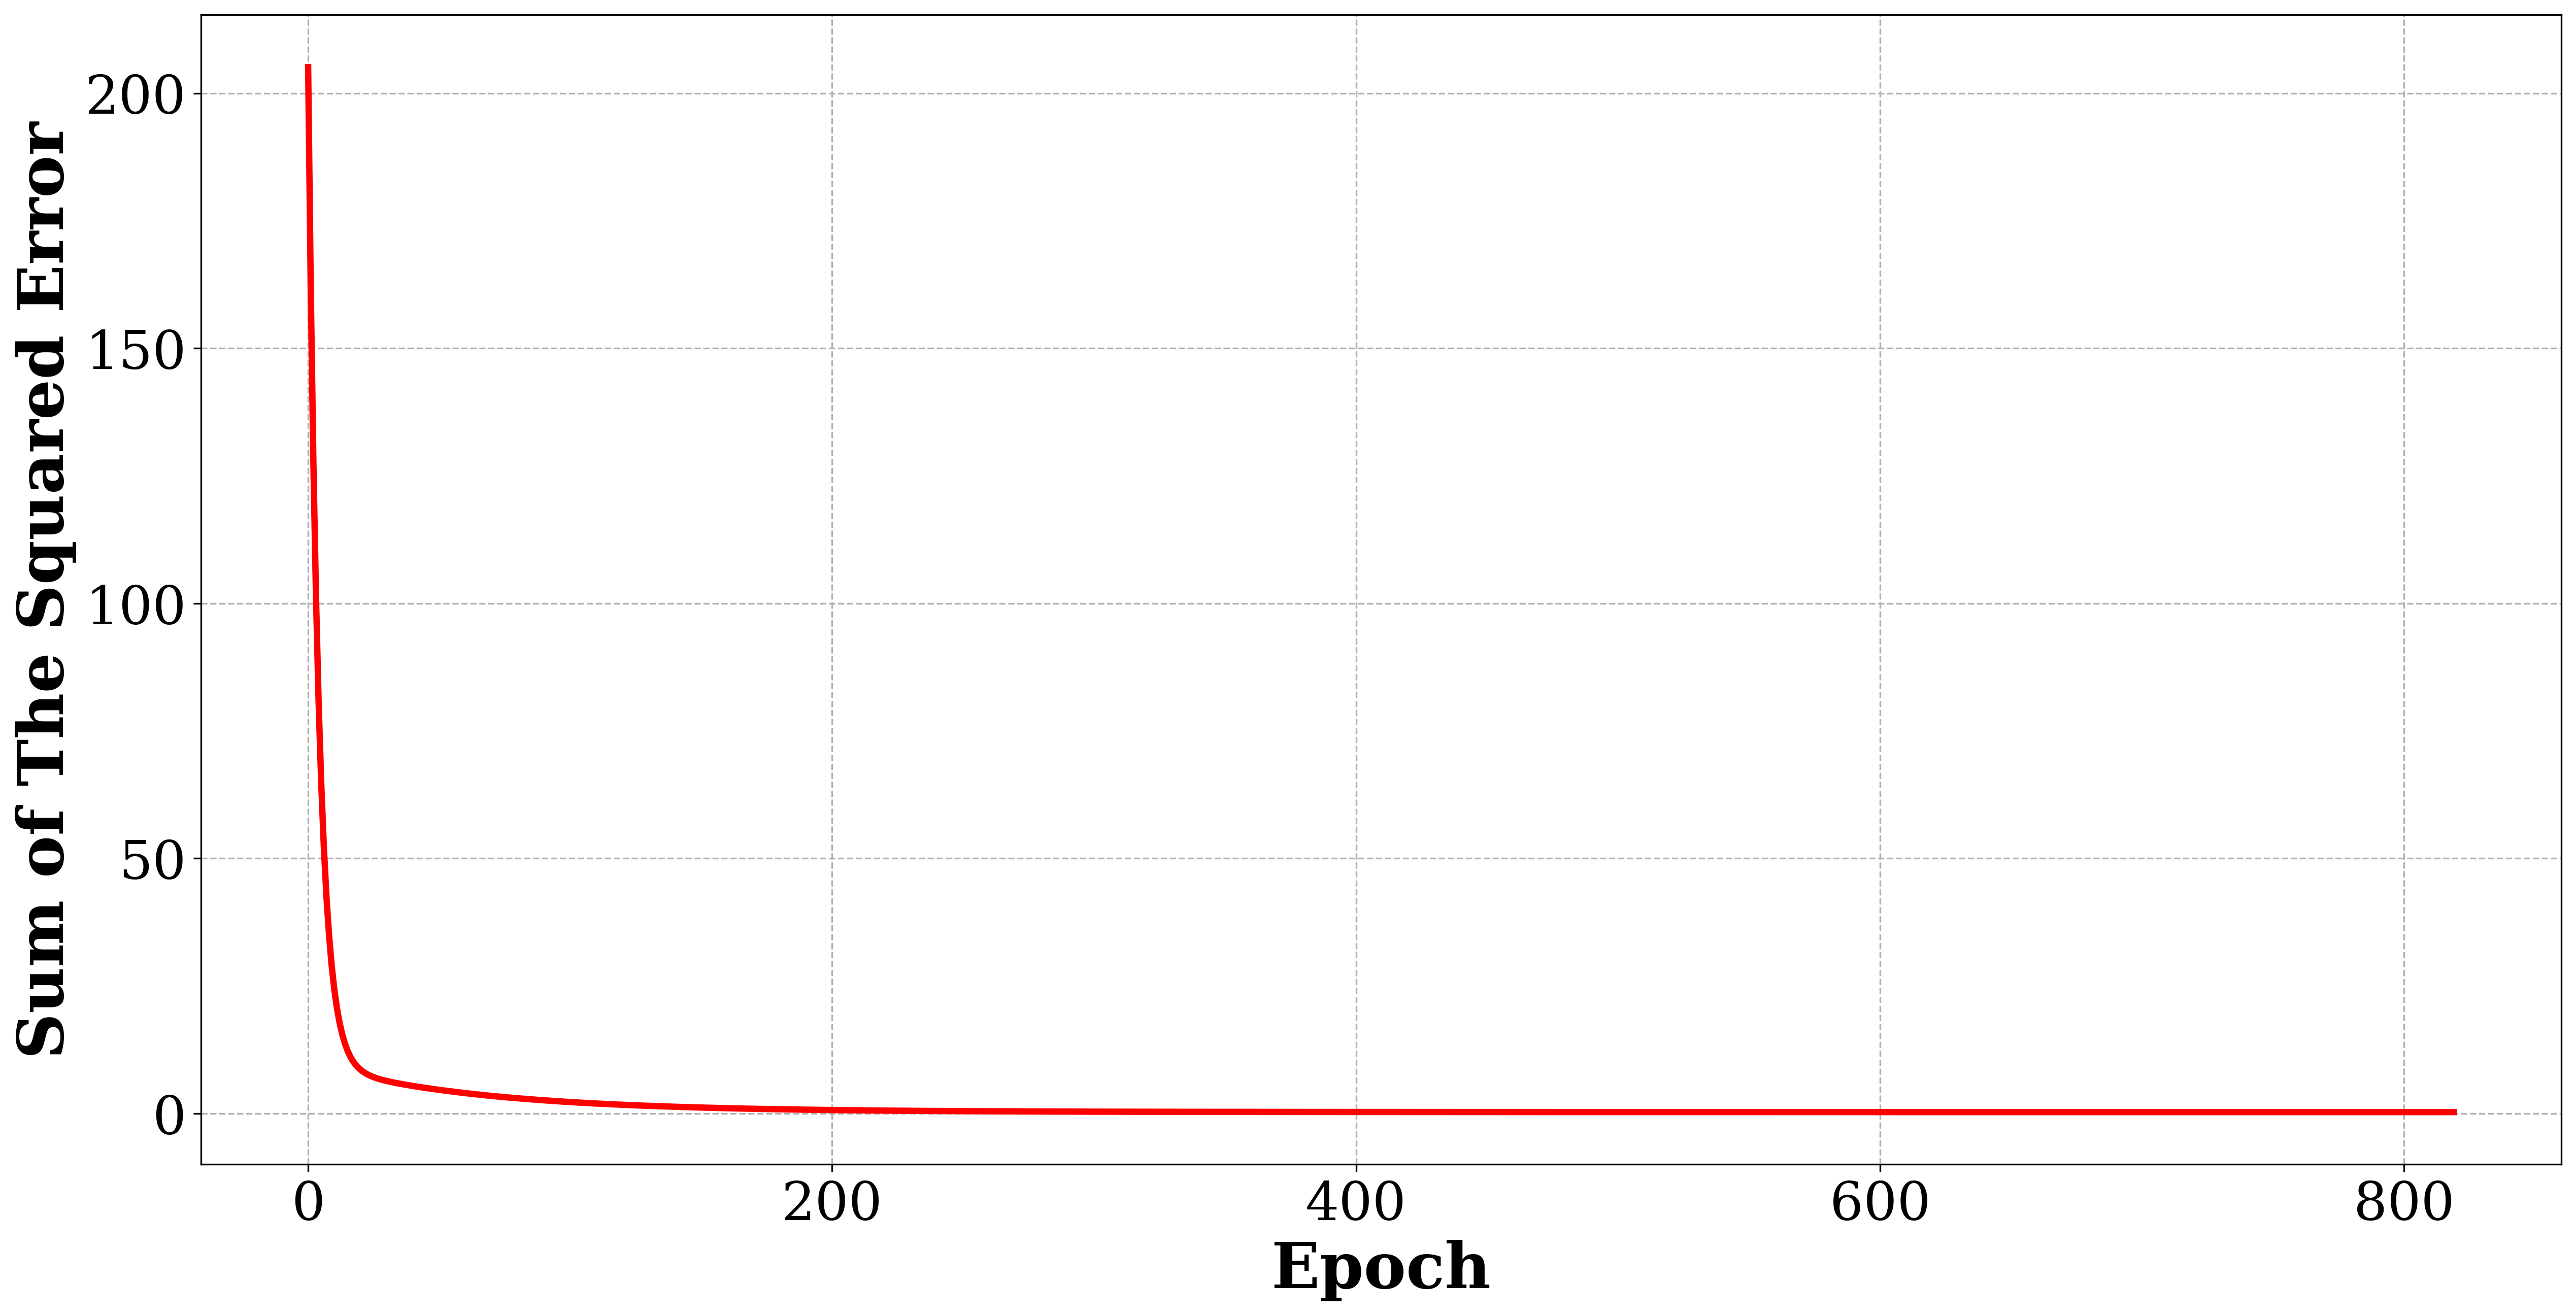

In [34]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

plt.figure(figsize=(20, 10), dpi=300)

plt.plot(x_plot, error_hist, color='red', linewidth=3)

plt.xlabel('Epoch', fontsize=30, fontweight='bold');
plt.ylabel('Sum of The Squared Error', fontsize=30, fontweight='bold');

plt.grid(linestyle='--')